# CM09 - decision trees - oefening 3 German Credit Data

Voor deze oefening kijken we naar de data set 'german'. Deze data set bevat gegevens van een Duitse bank over mensen die een lening aanvragen. De vraag is of de bank ze deze lening wil verstrekken. Dat doet de bank alleen als er een grote kans is dat mensen de lening kunnen terugbetalen. Wij gaan hiervoor een beslisboom algoritme bouwen.

#### Initialisatie
In de cell hieronder zetten we alle statements die packages inladen netjes bij elkaar. In de loop van het college zullen we hier nog een en ander aan toe moeten voegen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Data understanding
We gaan nu kijken naar de data set 'german.data'. De data staat op Canvas. Daar staat ook het data dictionary van de data set: hierin wordt uitgelegd wat de betekenis is van alle attributen.

### Opdracht 1.
Lees de data set in, bekijk de data set en krijg een eerste gevoel bij deze data. Zorg dat je in ieder geval de volgende zaken helder hebt:
- Wat zijn de meetniveau's van alle attributen?
- Zijn er attributen met *rare* waardes?

In [2]:
german = pd.read_csv('german.data', sep = ' ', quotechar = "'")

In [3]:
pd.set_option('display.max_columns', None)
german.head()

,Euros op rekening,Duur Lening,Leengeschiedenis,Doel vd Lening,Bedrag Lening,Bedrag op spaarrekening,Duur huidige baan,lening als perc van inkomen,persoonlijke status,overige schuldeisers,huidige woning sinds,eigendom,leeftijd,andere leningen,huisvesting,aantal leningen,baan,verantwoordelijk voor,telefoon,buitenlandse werknemer,lening terugbetaald
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67.0,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22.0,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49.0,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53.0,A143,A153,2,A173,2,A191,A201,2


In [4]:
german.columns

Index(['Euros op rekening', ' Duur Lening ', 'Leengeschiedenis',
       'Doel vd Lening ', ' Bedrag Lening', 'Bedrag op spaarrekening',
       'Duur huidige baan', 'lening als perc van inkomen ',
       'persoonlijke status', 'overige schuldeisers', 'huidige woning sinds ',
       'eigendom', 'leeftijd ', 'andere leningen', 'huisvesting',
       'aantal leningen', 'baan', 'verantwoordelijk voor ', 'telefoon',
       'buitenlandse werknemer', 'lening terugbetaald'],
      dtype='object')

In [5]:
german.isna().sum()

Euros op rekening               0
 Duur Lening                    0
Leengeschiedenis                0
Doel vd Lening                  0
 Bedrag Lening                  0
Bedrag op spaarrekening         0
Duur huidige baan               0
lening als perc van inkomen     0
persoonlijke status             0
overige schuldeisers            0
huidige woning sinds            0
eigendom                        0
leeftijd                        2
andere leningen                 0
huisvesting                     0
aantal leningen                 0
baan                            0
verantwoordelijk voor           0
telefoon                        0
buitenlandse werknemer          0
lening terugbetaald             0
dtype: int64

In [6]:
german.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Euros op rekening             1000 non-null   object 
 1    Duur Lening                  1000 non-null   int64  
 2   Leengeschiedenis              1000 non-null   object 
 3   Doel vd Lening                1000 non-null   object 
 4    Bedrag Lening                1000 non-null   int64  
 5   Bedrag op spaarrekening       1000 non-null   object 
 6   Duur huidige baan             1000 non-null   object 
 7   lening als perc van inkomen   1000 non-null   int64  
 8   persoonlijke status           1000 non-null   object 
 9   overige schuldeisers          1000 non-null   object 
 10  huidige woning sinds          1000 non-null   int64  
 11  eigendom                      1000 non-null   object 
 12  leeftijd                      998 non-null    float64
 13  ande

In [7]:
german.describe()

,Duur Lening,Bedrag Lening,lening als perc van inkomen,huidige woning sinds,leeftijd,aantal leningen,verantwoordelijk voor,lening terugbetaald
count,1000.000000,1000.000000,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.553106,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.381445,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


### Opdracht 2
Maak nu een boxplot van de leeftijd. Merk op dat standaard toepassen van plt.boxplot niet lukt als gevolg van de missende waarden in de data. Hoe kunnen we nu wel zo'n boxplot krijgen?

Trek ook conclusies over eventuele uitschieters en of we *iets* moeten doen met die uitschieters.

<AxesSubplot:>

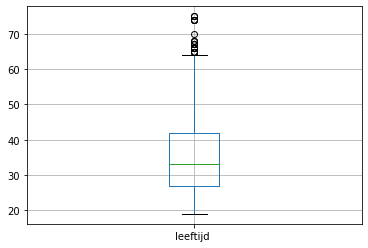

In [8]:
# het volgende commando werkt niet:
# plt.boxplot(german['leeftijd '])
# wat wel werkt:
german.boxplot('leeftijd ')
# en ook:
# plt.boxplot(german.loc[~ german['leeftijd '].isna() , 'leeftijd '])

### Opdracht 3
We gaan straks proberen een beslisboom te maken die voorspeld aan wie de bank zonder veel risico een lening kan verstrekken op basis van deze data. Probeer de target feature te vinden en maak een staafdiagram ('bar chart') voor deze feature. In dit staafdiagram moet je duidelijk kunnen aflezen hoe vaak de target feature welke waarde aanneemt. 

Text(0.5, 0, 'lening terugbetaald')

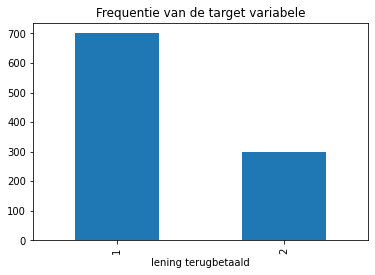

In [9]:
ax = german['lening terugbetaald'].value_counts().plot(kind = 'bar')
ax.set_title('Frequentie van de target variabele')
ax.set_xlabel('lening terugbetaald')

## Data preparation
We gaan de dataset nu klaarstomen voor een decision tree met behulp van een aantal opschoningsacties.

### Opdracht 4.
Niet alleen de waardes van een attribuut kunnen *rotzooi* bevatten, ook de attribuutnamen ofwel kolomnamen. Als er spaties in de kolomnaam staan, dan kun je niet meer gebruik maken van de dot-notatie van pandas. Kijk bijvoorbeeld maar eens naar het attribuut *leeftijd*. Bij opdracht 2. heb je waarschijnlijk al gemerkt dat de kolomnaam eigenlijk 'leeftijd ' is met een extra spatie die daar op een of andere manier ingekomen is. Waarschijnlijk bij het exporteren van een Excelsheet naar een CSV bestand... 

Anyway, dit spatie moet weg! Je kunt bijvoorbeeld niet de kolom leeftijd selecteren door german.leeftijd. Wat wel altijd werkt is het selecteren van kolommen door middel van de brackets [], bijvoorbeeld german['leeftijd ']. Maar stel dat we nu gewoon de kolomnaam van leeftijd willen hernoemen en de spatie weghalen, hoe kunnen we dit doen?

In [10]:
# Merk op:
# german.columns[12] = 'leeftijd'
# werkt niet, want columns is van data type 'Index' en dit data type is not mutable.
# Eventueel kun je wel alle kolomnamen op deze wijze veranderen. Als je echter één naam wil wijzigen,
# gebruik dan:
german.rename(columns={'leeftijd ': 'leeftijd'}, inplace = True)

In [11]:
german.columns

Index(['Euros op rekening', ' Duur Lening ', 'Leengeschiedenis',
       'Doel vd Lening ', ' Bedrag Lening', 'Bedrag op spaarrekening',
       'Duur huidige baan', 'lening als perc van inkomen ',
       'persoonlijke status', 'overige schuldeisers', 'huidige woning sinds ',
       'eigendom', 'leeftijd', 'andere leningen', 'huisvesting',
       'aantal leningen', 'baan', 'verantwoordelijk voor ', 'telefoon',
       'buitenlandse werknemer', 'lening terugbetaald'],
      dtype='object')

### Opdracht 5.a.
De laatste stap voordat we kunnen gaan modelleren is het selecteren van de juiste features. Ten eerste moeten we ons afvragen of het **ethisch verantwoord** om het attribuut te gebruiken. Maak een selectie van de attributen die wel geschikt zijn en licht toe waarom je bepaalde attributen niet geschikt vindt.

In [12]:
# Persoonlijke status is een combinatie van geslacht en burgelijke staat, vooral geslacht gebruiken is niet ethisch
# Buitenlandse afkomst meenemen is natuurlijk ook not done
german_ethisch = german.drop(['persoonlijke status', 'buitenlandse werknemer'], axis = 1)

### Opdracht 5.b.
Ten tweede moeten we kijken naar het meetniveau van de attributen: niet alle meetniveau's zijn geschikt voor een beslisboom. Het Decision Tree algoritme van sci-kit learn kan alleen kwantitatieve features aan als input en kan ook niet omgaan met missende waarden. Een mogelijke oplossing is om de rijen met missende waarden weg te laten en de kwalitatieve features om te zetten met behulp van get_dummies.

Merk op: hoewel deze oplossing niet optimaal is voor wat betreft de performance, zullen we hier nu voor kiezen. Alternatieven zijn om de beslisboom te maken in R (waar wel een standaardimplementatie is die overweg kan met categoriale features en missings) of te kiezen voor een ander python package. Voor dit laatste zijn er verschillende mogelijkheden onder andere: CatBoost, LightGBM, of H2O, maar elk ook weer met hun eigen nadelen. Zo kan CatBoost bijvoorbeeld  alleen symmetrische decision trees leren en is de visualisatie van een boom niet begrijpelijk. 

In [13]:
is_categorical = np.where(german_ethisch.dtypes == 'object')[0]
german_binary = pd.get_dummies(data = german_ethisch, columns = german_ethisch.columns[is_categorical])
german_binary

,Duur Lening,Bedrag Lening,lening als perc van inkomen,huidige woning sinds,leeftijd,aantal leningen,verantwoordelijk voor,lening terugbetaald,Euros op rekening_A11,Euros op rekening_A12,Euros op rekening_A13,Euros op rekening_A14,Leengeschiedenis_A30,Leengeschiedenis_A31,Leengeschiedenis_A32,Leengeschiedenis_A33,Leengeschiedenis_A34,Doel vd Lening _A40,Doel vd Lening _A41,Doel vd Lening _A410,Doel vd Lening _A42,Doel vd Lening _A43,Doel vd Lening _A44,Doel vd Lening _A45,Doel vd Lening _A46,Doel vd Lening _A48,Doel vd Lening _A49,Bedrag op spaarrekening_A61,Bedrag op spaarrekening_A62,Bedrag op spaarrekening_A63,Bedrag op spaarrekening_A64,Bedrag op spaarrekening_A65,Duur huidige baan_A71,Duur huidige baan_A72,Duur huidige baan_A73,Duur huidige baan_A74,Duur huidige baan_A75,overige schuldeisers_A101,overige schuldeisers_A102,overige schuldeisers_A103,eigendom_A121,eigendom_A122,eigendom_A123,eigendom_A124,andere leningen_A141,andere leningen_A142,andere leningen_A143,huisvesting_A151,huisvesting_A152,huisvesting_A153,baan_A171,baan_A172,baan_A173,baan_A174,telefoon_A191,telefoon_A192
0,6,1169,4,4,67.0,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
1,48,5951,2,2,22.0,1,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49.0,1,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
3,42,7882,2,4,45.0,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53.0,2,2,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31.0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
996,30,3857,4,4,40.0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
997,12,804,4,4,38.0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
998,45,1845,4,4,23.0,1,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


Verwijder nu de rijen met missende waarden

In [14]:
german_nomissings = german_binary.dropna()

## Modelling
De dataset is klaar voor het decision tree algoritme.

### Opdracht 6.
Doorloop de bekende stappen om tot een beslisboom komen. Bepaal de kwaliteit van de beslisboom met de juiste metrics. Pas de hyperparameters aan om tot een zo hoog mogelijke score te komen.

In [15]:
X_train, X_test, y_train, y_test = \
train_test_split(german_nomissings.drop(['lening terugbetaald'], axis = 1), \
                 german_nomissings['lening terugbetaald'], train_size = 0.7, random_state = 42)

In [16]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [17]:
model_pred = model.predict(X_test)
np.round(accuracy_score(y_test, model_pred),3) 

0.707

In [18]:
# Itereren over een aantal hyperparameters
max_depth = 30
depths = range(max_depth)
min_leaf = [5,10,25,50]
min_split = [5, 10,25,50]

best_depth = 0
best_leaf = 0
best_split = 0
highscore = 0

for depth in depths[1:]:
    for leaf in min_leaf:
        for split in min_split:
            model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf = leaf, min_samples_split = split)
            model.fit(X_train, y_train)
            model_pred = model.predict(X_test)
            score = accuracy_score(y_test, model_pred) 
            if score > highscore:
                highscore = score
                best_depth = depth
                best_leaf = leaf
                best_split = split

In [19]:
print("Highscore: ", np.round(highscore,2))
print("Best max_depth: ", best_depth)
print("Best min_leaf: ", best_leaf)
print("Best min_split: ", best_split)


Highscore:  0.77
Best max_depth:  6
Best min_leaf:  10
Best min_split:  5


### Opdracht 7.
Beargumenteer of de hoogst gevonden accuracy *goed* is of niet.

Het baseline model zegt: *"Iedereen heeft z'n lening terugbetaald."* Ofwel: 'lening terugbetaald' = 1. Je model scoort dan een accuracy van 73,3%. De gevonden accuracy van 77% is maar een kleine verbetering...

In [21]:
y_pred_baseline = np.ones(len(y_test))

In [22]:
accuracy_score(y_test, y_pred_baseline)

0.7333333333333333

### Opdracht 8.
Visualiseer tenslotte deze beslisboom. Is deze in de praktijk te gebruiken in een oplossing / applicatie? En is deze uit te leggen aan de *business* of klant?

In [23]:
model = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf = best_leaf, min_samples_split = best_split)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=5)

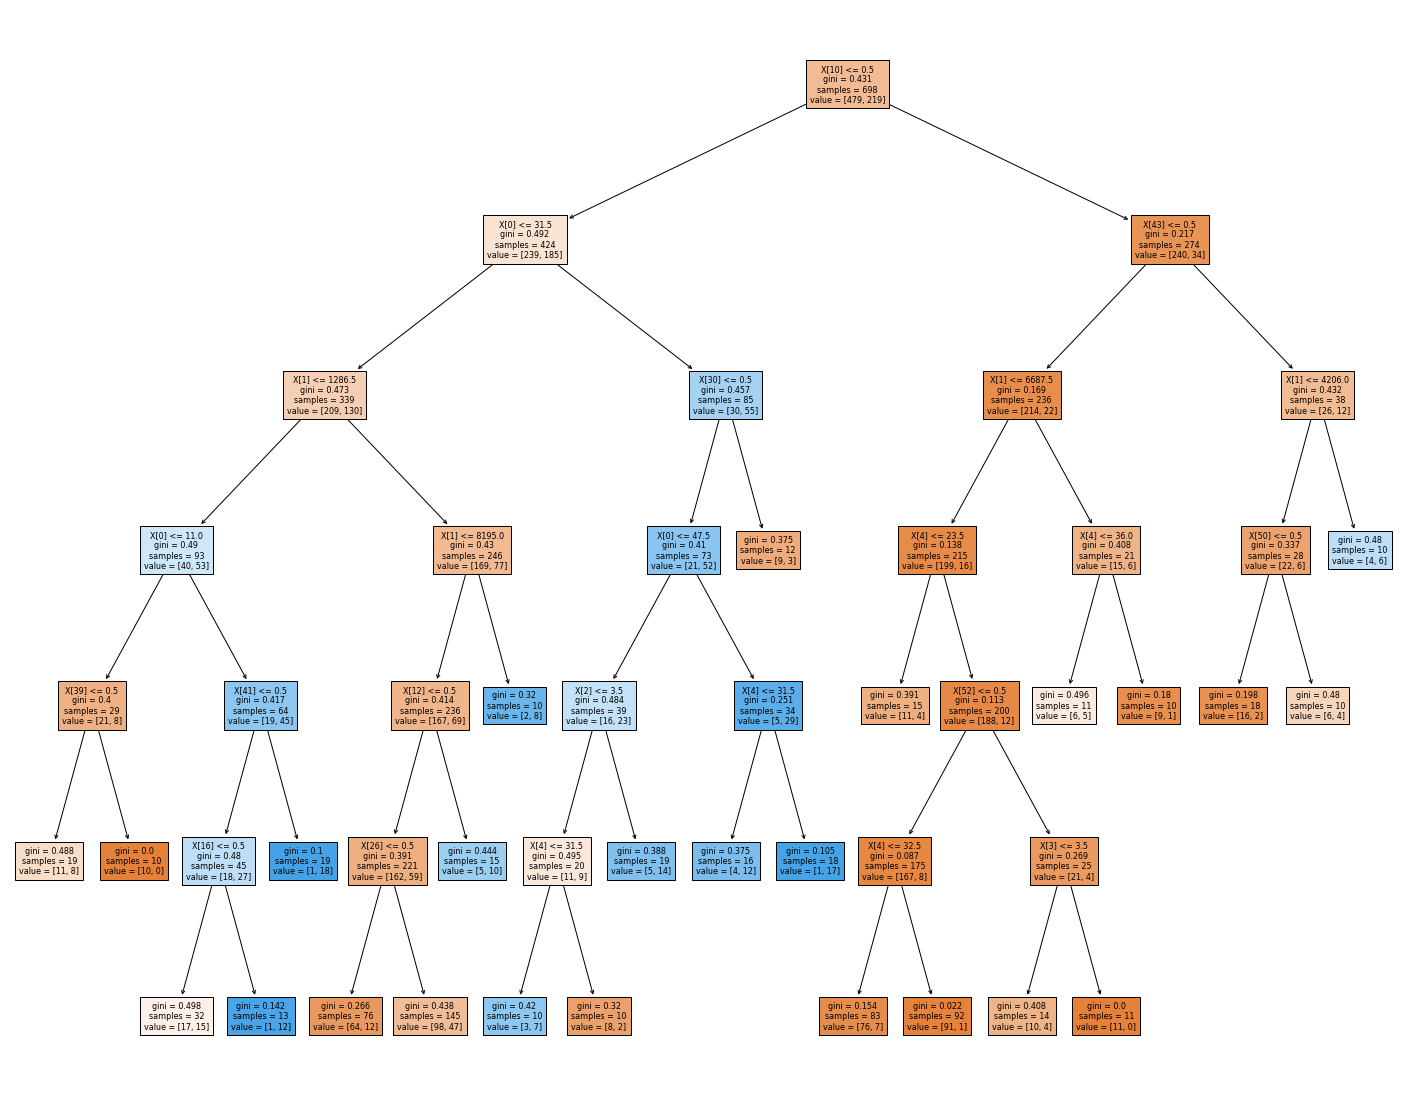

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, filled=True, fontsize = 8)

## Bonusopdracht: kNN toepassen
Tijdens het vorige college hebben we gekeken naar het kNN classificatie algoritme. Dat kun je natuurlijk ook gebruiken voor deze dataset. Maar is kNN wel geschikt (zonder te kijken naar de beste accuracy score)?

Kijk naar de dataset en bepaal of deze geschikt is voor kNN. Train een kNN model en vergelijk de score met de beste accuracy van de beslisboom.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
german_knn = german[[' Duur Lening ', ' Bedrag Lening', 'lening als perc van inkomen ', 'huidige woning sinds ', 'leeftijd', 'aantal leningen', 'lening terugbetaald']]
german__knn_nomissings = german_knn.dropna()

In [27]:
X_train, X_test, y_train, y_test = \
train_test_split(german__knn_nomissings.drop(['lening terugbetaald'], axis = 1), \
                 german__knn_nomissings['lening terugbetaald'], train_size = 0.7, random_state = 42)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.69

Dit is slechter dan het baseline model dus waardeloos!

#### Extra acties
Er zijn natuurlijk nog meer acties mogelijk om tot een hogere accuracy te komen:
- Experimenteren met verschillende waardes voor k,
- Als afstandsfunctie 'distance' ipv 'uniform' gebruiken,
- Data normaliseren,
- Ordinale categorieën worden nu niet gebruikt, je zou attributen zoals 'Euros op rekening' en 'Bedrag op spaarrekening' naar discrete waardes kunnen omzetten, maar dat is niet zo netjes volgens Mark :-)